## Predicting heart disease using Machine Learning 

This notebook looks into using various Python-based ML and data science libraries in an attempt to build a machine learning 
model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition 
2. Data
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem definition 

In a statement 
> Given clinical parameters, can we predict heart disease 

## 2. Data 

The data is available here - https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation 

> Accuracy - needs to be at 95 % 

## 4. Features 

This is where you get different info on each of the fields in your data 

**Creating data dictionary**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Preparing the tools 

We are going to use pandas, Matplotlib and Numpy for data analysis and manipulation 

In [1]:
# Import all the tools we need 

# Regular EDA and plotting libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# This will help the plots to appier inside this notebook 
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

In [4]:
# get the data 

df = pd.read_csv("data/heart-disease.csv")
df.shape # rows , columns 

(303, 14)

## Data Explloration (Exploratory Data Analysis or EDA)

The goal here is understand our data 

1. What is it that we are trying to slove 
2. What kind of data do we have and how do we treat different types?
3. What's missing and how tp deal with them?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of the data?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# identify the distribution of the class 
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

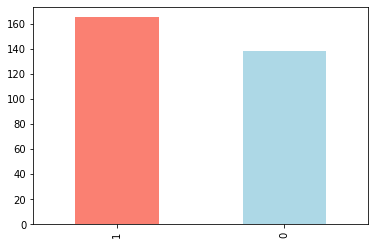

In [9]:
df['target'].value_counts().plot(kind = 'bar', color = ["salmon","lightblue"]);

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df['sex'].value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

In [12]:
## Compare target column with 

pd.crosstab(index = df['target'], columns = df['sex'], normalize=True)

sex,0,1
target,,
0,0.079208,0.376238
1,0.237624,0.306931


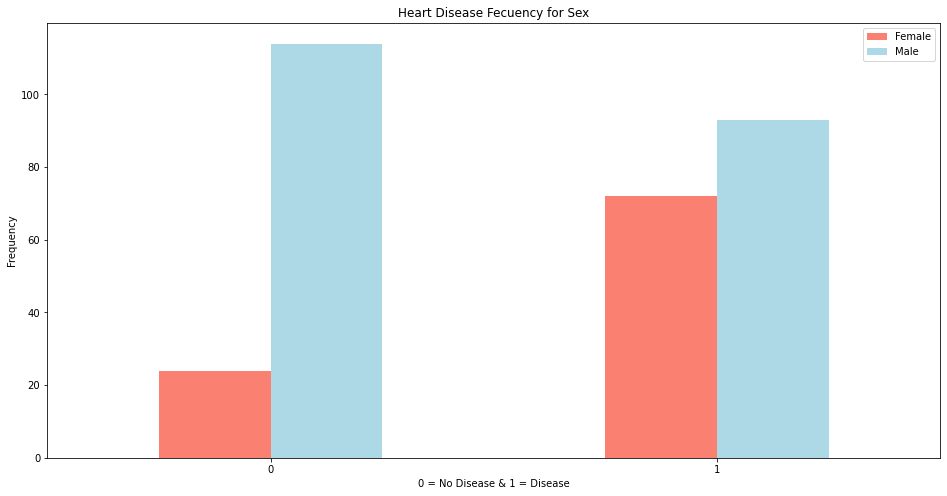

In [13]:
pd.crosstab(index = df['target'], columns = df['sex']).plot(kind = 'bar',
                                                           figsize= (16,8),
                                                           color = ["salmon", "lightblue"])

plt.title("Heart Disease Fecuency for Sex")
plt.xlabel("0 = No Disease & 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

### Age vs Max Heart Rate for Heart Disease (Thalach)

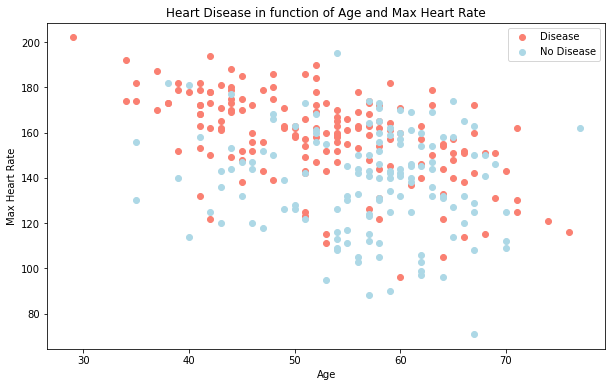

In [14]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples 
plt.scatter(x = df.loc[df['target'] ==1,['age']], 
            y = df.loc[df['target'] ==1,['thalach']],
            c="salmon")

# Scatter with negative examples 
plt.scatter(x = df.loc[df['target'] ==0,['age']], 
            y = df.loc[df['target'] ==0,['thalach']],
            c="lightblue")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease','No Disease'])
plt.title("Heart Disease in function of Age and Max Heart Rate");

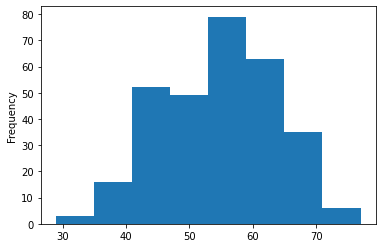

In [15]:
# Check the distribution 
df.age.plot.hist(bins=8);

### Heart disease frequecy for chest pain 

In [16]:
pd.crosstab(index = df['cp'], columns= df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


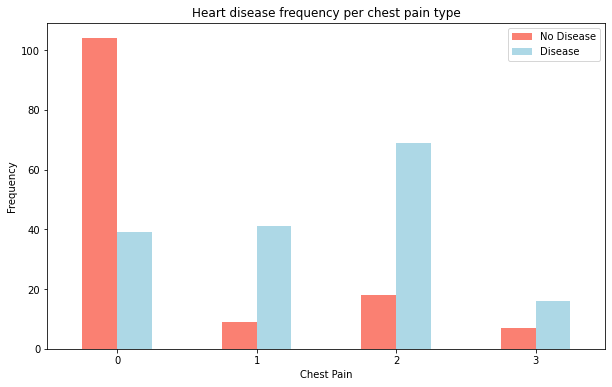

In [17]:
pd.crosstab(index = df['cp'], columns= df['target']).plot(kind = 'bar',
                                                         figsize = (10,6),
                                                         color = ["salmon", "lightblue"])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel ("Chest Pain")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation =0);

In [18]:
# make a correlation matrix 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


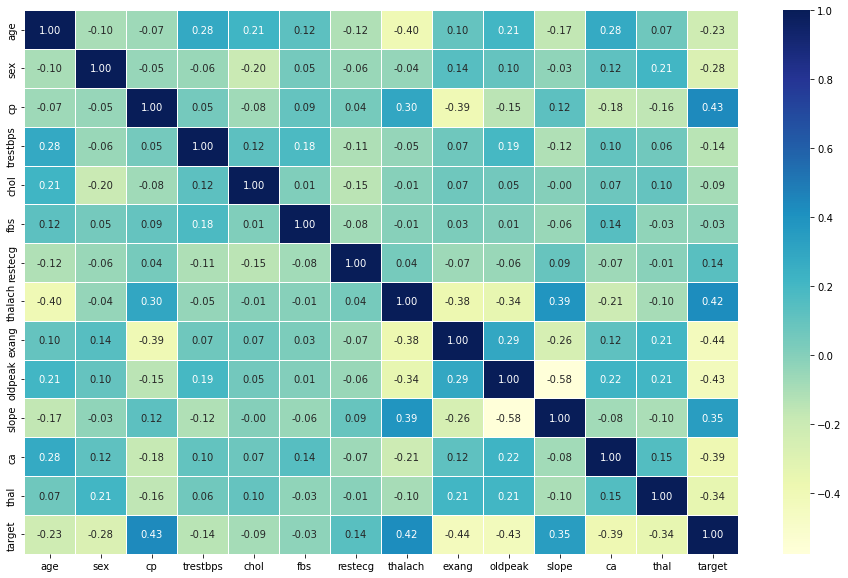

In [19]:
# Plot the correlation matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (16,10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")

## 5. Modelling 


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into x, y 

x = df.drop(columns=['target'])

y = df['target']

# split data into train and test 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

Now that we've got the data into train and test data, we need to build a model 

We need to train it and then test it. 

1. Logistic Regression
2. KNN classifier
3. Random Forest Classifier 

In [22]:
# put models in a dictionary 

models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models 

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit - Learn machine learning models 
    x_train : training data (no labels)
    x_test : test data (no labels)
    y_train : training labels 
    y_test : test labels 
    """
    # set random seed 
    np.random.seed(42)
    # make a dictionary to keep the model scores 
    model_scores = {}
    # loop through the models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(x_train, y_train)
        # evaluate the model and append the score to model_score 
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models=models, 
              x_train=x_train, 
              x_test= x_test, 
              y_train=y_train, 
              y_test=y_test)

E:\Sumanth\data_science_learning\Learnings\udemy_datascience\milestone_heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Comparision 

In [24]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

In [25]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.622951,0.852459


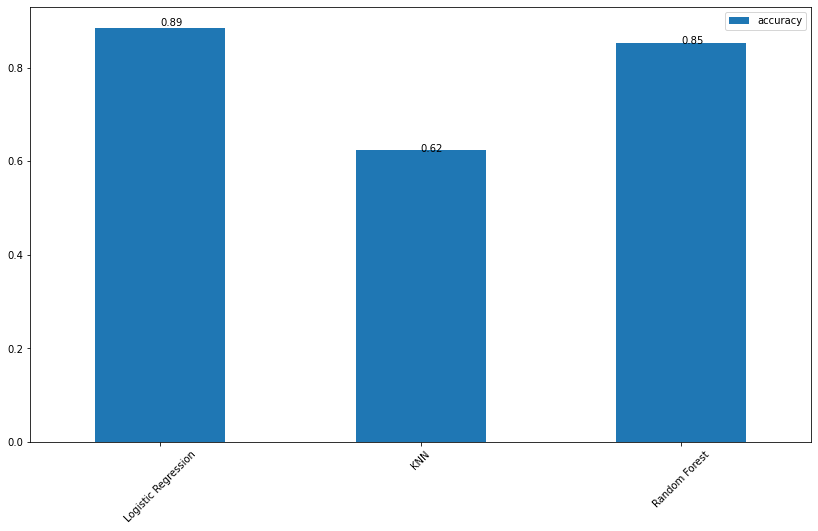

In [26]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

model_compare.T.plot(kind = 'bar', figsize = (14,8))
plt.xticks(rotation = 45)
addlabels(list(model_compare.columns),round(model_compare,2).iloc[0]);

We now have a baseline model. We assume that any model's first predictions aren't always reliable 

We look at the following:
* Hyperparameter Tuning 
* Feature importance 
* Confusion Matrix
* Precision 
* Recall
* F1 Score 
* Classification report
* ROC Curve
* Area Under the curve 

### Hyperparameter tuning 

In [27]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of diferent values for n_neighbors 
neighbors = range(1,21)

# Setup KNN instance 

knn = KNeighborsClassifier()

# Loop through difference n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(x_train,y_train))

    # update the test scores list
    test_scores.append(knn.score(x_test,y_test))
    

In [28]:
train_scores

[1.0,
 0.7975206611570248,
 0.8016528925619835,
 0.7727272727272727,
 0.7396694214876033,
 0.768595041322314,
 0.7727272727272727,
 0.7479338842975206,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.6983471074380165,
 0.7148760330578512,
 0.6942148760330579,
 0.7066115702479339,
 0.7066115702479339,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165]

In [29]:
test_scores

[0.6065573770491803,
 0.5901639344262295,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082]

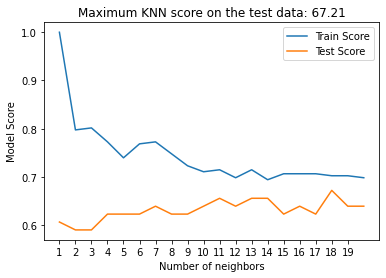

In [30]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,20,1))
plt.title(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}");

### Hyperparameter tuning by RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... Using RandomizedCV 

In [31]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10,1000, 50),
    "max_depth" : [None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2) }

Now we tune the models using the above grids and RandomizedSearchCV

In [32]:
# Tune the Logistic Regression

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(estimator= LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20, verbose=True)

# Fit the random hyperparameter search model for Logistic Regression 
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(x_test, y_test)

0.8688524590163934

In [35]:
# Tune the Logistic Regression

np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(estimator= RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv = 5,
                                n_iter=20, verbose=True)

# Fit the random hyperparameter search model for Logistic Regression 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
# Evaluate the performance of rs_rf
rs_rf.score(x_test, y_test)


0.8524590163934426

In [38]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8524590163934426}

1. by hand
2. RandomizedSearchCV 
3. GridSearchCV

## Hyperparameter Tunning using GridSearchCV

Since our Logistic regression model provides the best scores so far, we'll try and improve them again using GridSearchCV


In [39]:
# Different Hyperparameters for our LogisticRegression 
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10,1000, 50),
    "max_depth" : [None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2) }

In [40]:
# set up hyperparameter search for Logistic Regression 

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the Gridsearch model

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
# check the best 
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [42]:
# evaluate 

gs_log_reg.score(x_test, y_test)

0.8852459016393442

##Evaluating our tuned machine learning classifier, beyond accuracy 

* ROC curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 - Score

Use CV where ever possible 

In [43]:
# make predictions with tuned model 

y_preds = gs_log_reg.predict(x_test)
y_pred_proba = gs_log_reg.predict_proba(x_test)

In [44]:
y_preds

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

E:\Sumanth\data_science_learning\Learnings\udemy_datascience\milestone_heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


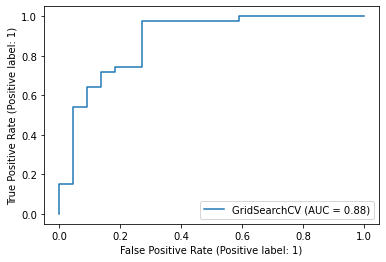

In [45]:
# plot ROC curve

plot_roc_curve(estimator= gs_log_reg, X = x_test, y = y_test)

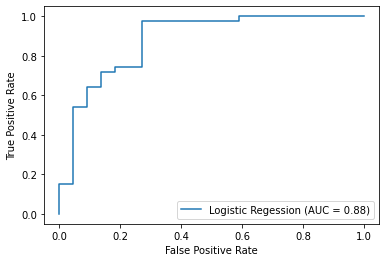

In [46]:
# New way of doing it 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regession')
display.plot()

plt.show()

In [47]:
# Confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[16  6]
 [ 1 38]]


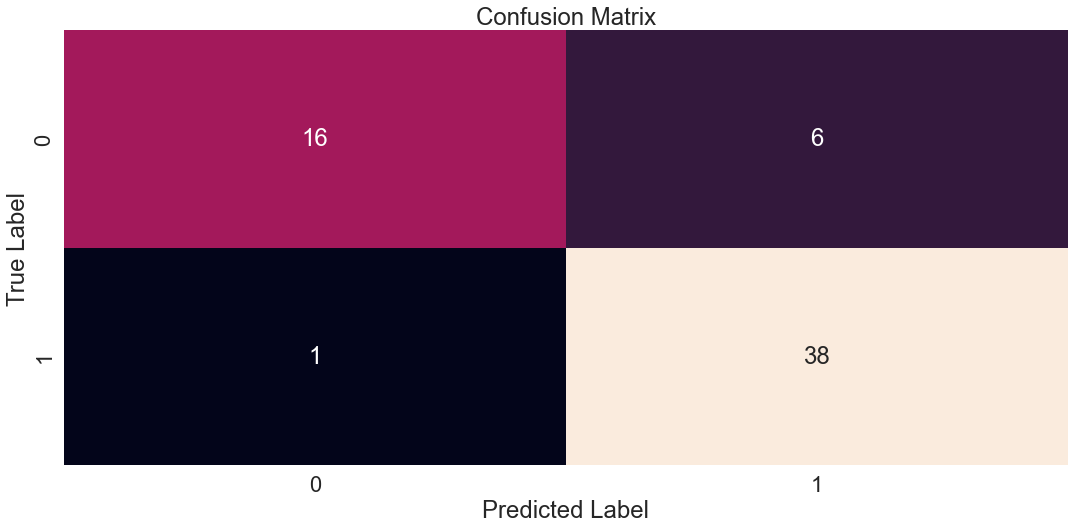

In [48]:
sns.set(font_scale = 2)
def plot_conf_mat (y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    y_test : test label
    y_preds : predicted output from y_test
    """
    fig, ax = plt.subplots(figsize = (18,8))
    ax = sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_preds),
                     annot=True,
                     cbar = False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    

plot_conf_mat(y_test=y_test, y_preds= y_preds)

Lets get the Classification report 

-- It is only generated by one set of data may not be reliable 

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.86      0.97      0.92        39

    accuracy                           0.89        61
   macro avg       0.90      0.85      0.87        61
weighted avg       0.89      0.89      0.88        61



### Evaluate with Crss Validation metrics using cross-validation 

We're going to calculate precicion, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`  

In [52]:
gs_log_reg.best_params_


{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [62]:
clf = LogisticRegression(C=0.38566204211634725,
                        solver='liblinear')

cv_acc = cross_val_score(clf, 
                                X = x_test,
                                y = y_test,
                                cv = 5,
                                scoring= "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8025641025641026

In [67]:
cv_precision = cross_val_score(clf, 
                                X = x_test,
                                y = y_test,
                                cv = 5,
                                scoring= "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8238888888888889

In [64]:
cv_recall = cross_val_score(clf, 
                                X = x_test,
                                y = y_test,
                                cv = 5,
                                scoring= "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.925

In [65]:
cv_f1 = cross_val_score(clf, 
                                X = x_test,
                                y = y_test,
                                cv = 5,
                                scoring= "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.860578898225957

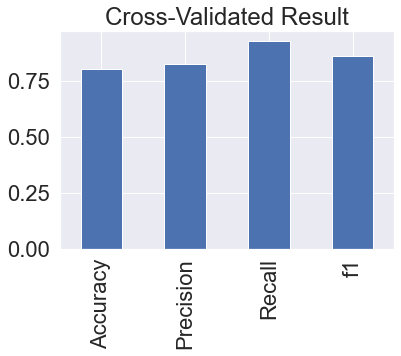

In [77]:
# Visualize 

cv_metrics = pd.DataFrame(data = {"Accuracy" : cv_acc,
                                 "Precision" : cv_precision,
                                 "Recall" : cv_recall,
                                 "f1" : cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title = "Cross-Validated Result", legend = False);

In [71]:
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.802564,0.823889,0.925,0.860579


### Feature importance 

Find the most important features that have a higher contribution to our model

Feature importance is different for each model.

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# Fit an instance of LR

clf = LogisticRegression(C = 0.38566204211634725,
                        solver='liblinear')

clf.fit(x_train,y_train);

In [87]:
# Check the Coef 
clf.coef_[0]

array([ 0.00444423, -0.94980158,  0.75115665, -0.0140714 , -0.00142151,
       -0.0270526 ,  0.52831582,  0.02766178, -0.74294355, -0.65575861,
        0.15138607, -0.67355016, -0.57425086])

In [88]:
# Match Coefs to each of the columns 

feature_dict = {i:j for i,j in zip(list(x.columns),list(clf.coef_[0]))}
feature_dict

{'age': 0.004444228584316143,
 'sex': -0.9498015793256489,
 'cp': 0.7511566487855922,
 'trestbps': -0.014071396017019502,
 'chol': -0.0014215104987834557,
 'fbs': -0.027052604002567638,
 'restecg': 0.5283158187592567,
 'thalach': 0.027661775958468443,
 'exang': -0.7429435490727343,
 'oldpeak': -0.6557586074219737,
 'slope': 0.15138607237636262,
 'ca': -0.6735501565419635,
 'thal': -0.5742508588632195}

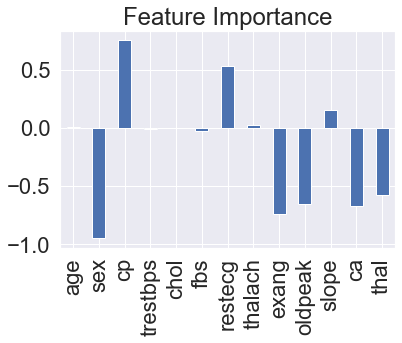

In [91]:
#visualise Feature importance 

feature_df = pd.DataFrame(data=feature_dict, index= [0])

feature_df.T.plot.bar(title = "Feature Importance", legend = False);